In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/video-game-reviews-and-ratings/video_game_reviews.csv


<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
<p style="font-size:45px; font-family:tahoma; line-height: 2em; text-indent: 70px;color:white">Hello Kagglers!!!  </p>
<p style="font-size:24px; font-family:tahoma; line-height: 2em; text-indent: 70px;">In this notebook, we will perform step by step analysis of Video Games.  </p>
<p style="font-size:24px; font-family:tahoma; line-height: 2em; text-indent: 70px;">We will check how the Price, Genre, Game Length, Graphics Quality and many other factors impact the User Rating  </p>
<p style="font-size:24px; font-family:tahoma; line-height: 2em; text-indent: 70px;color:blue">Based on the above analysis, we will try to develop a Machine Learning Model that can estimate the future rating a Game will earn </p></div></div>

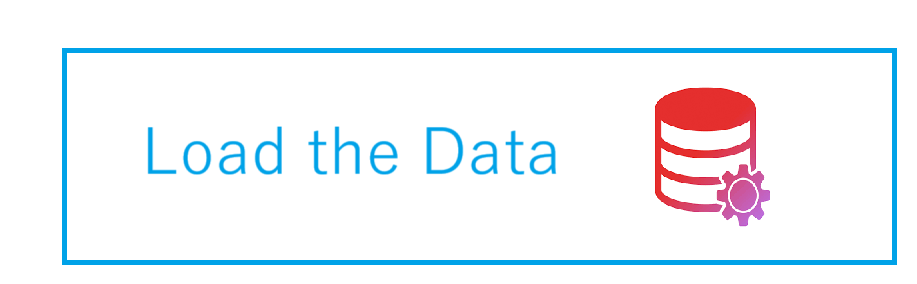
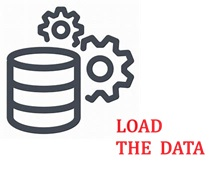
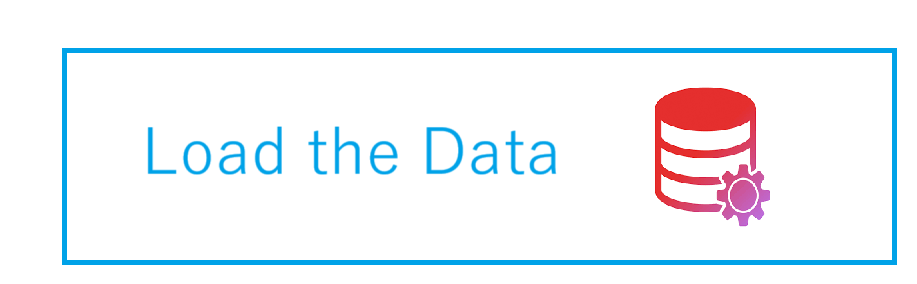

In [2]:
df = pd.read_csv("/kaggle/input/video-game-reviews-and-ratings/video_game_reviews.csv")

### Data 

In [3]:
df.head()

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1








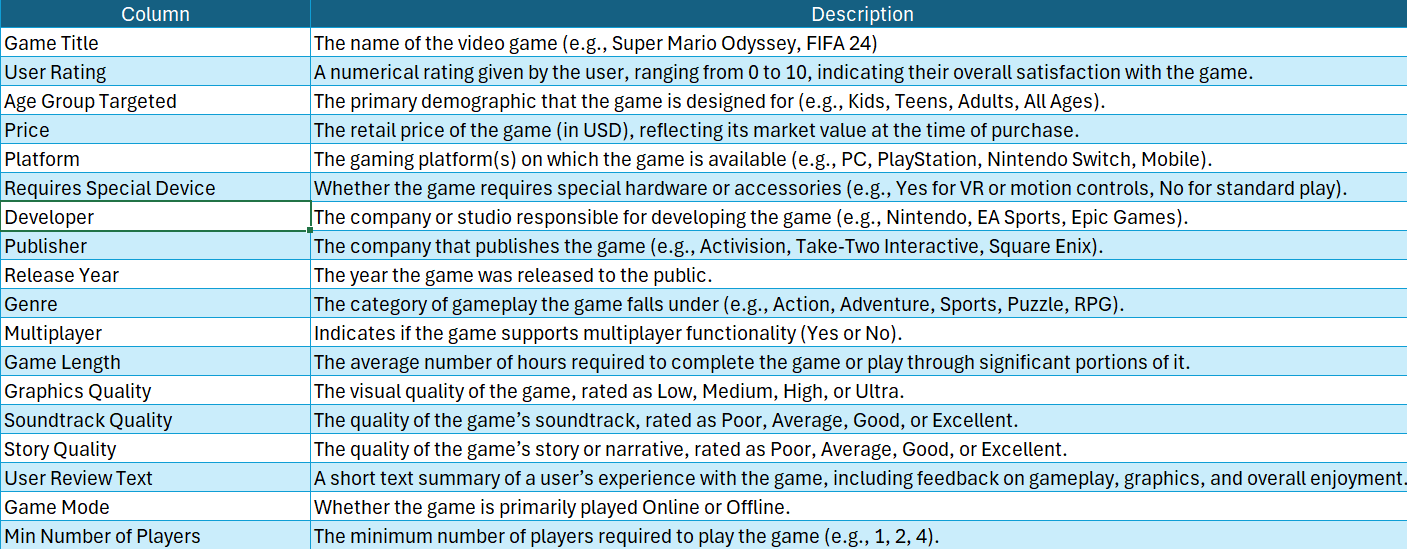




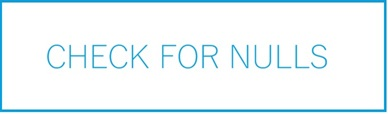

In [4]:
df.isnull().sum()

Game Title                 0
User Rating                0
Age Group Targeted         0
Price                      0
Platform                   0
Requires Special Device    0
Developer                  0
Publisher                  0
Release Year               0
Genre                      0
Multiplayer                0
Game Length (Hours)        0
Graphics Quality           0
Soundtrack Quality         0
Story Quality              0
User Review Text           0
Game Mode                  0
Min Number of Players      0
dtype: int64

<div style="background-color:#66cdaa;;border:0px solid #0A2342; text-align:left; color:black">
<p style="font-size:25px; font-family:tahoma; line-height: 2em; text-indent: 70px;color:white">There are 0 null values in the dataset </p>

<div style="background-color:white; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
<p style="font-size:25px; font-family:tahoma; line-height: 2em; text-indent: 70px;color:black">Total Records in the Dataset  </p>

In [5]:
df.shape[0]

47774

<div style="background-color:#66cdaa;;border:0px solid #0A2342; text-align:left; color:black">
<p style="font-size:25px; font-family:tahoma; line-height: 2em; text-indent: 70px;color:black">Total Records in the Dataset  are 47,774</p>

### Check the Data Distribution

In [6]:
df.columns

Index(['Game Title', 'User Rating', 'Age Group Targeted', 'Price', 'Platform',
       'Requires Special Device', 'Developer', 'Publisher', 'Release Year',
       'Genre', 'Multiplayer', 'Game Length (Hours)', 'Graphics Quality',
       'Soundtrack Quality', 'Story Quality', 'User Review Text', 'Game Mode',
       'Min Number of Players'],
      dtype='object')

### Outliers Analysis

<Axes: >

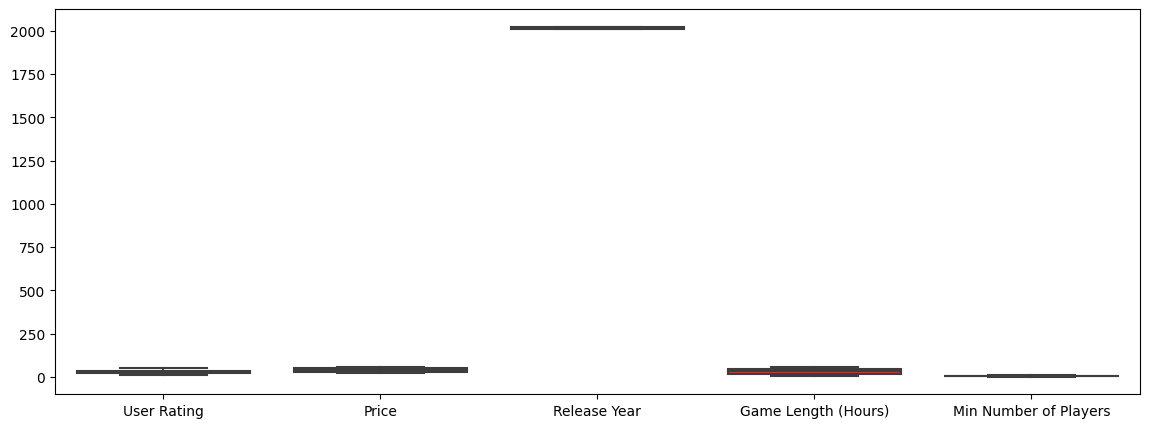

In [7]:
plt.figure(figsize=(14,5))
sns.boxplot(df)

### There are no outliers in the dateset

<div style="background-color:white; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
<p style="font-size:25px; font-family:tahoma; line-height: 2em; text-indent: 70px;color:black">Value Distributions across Columns </p>

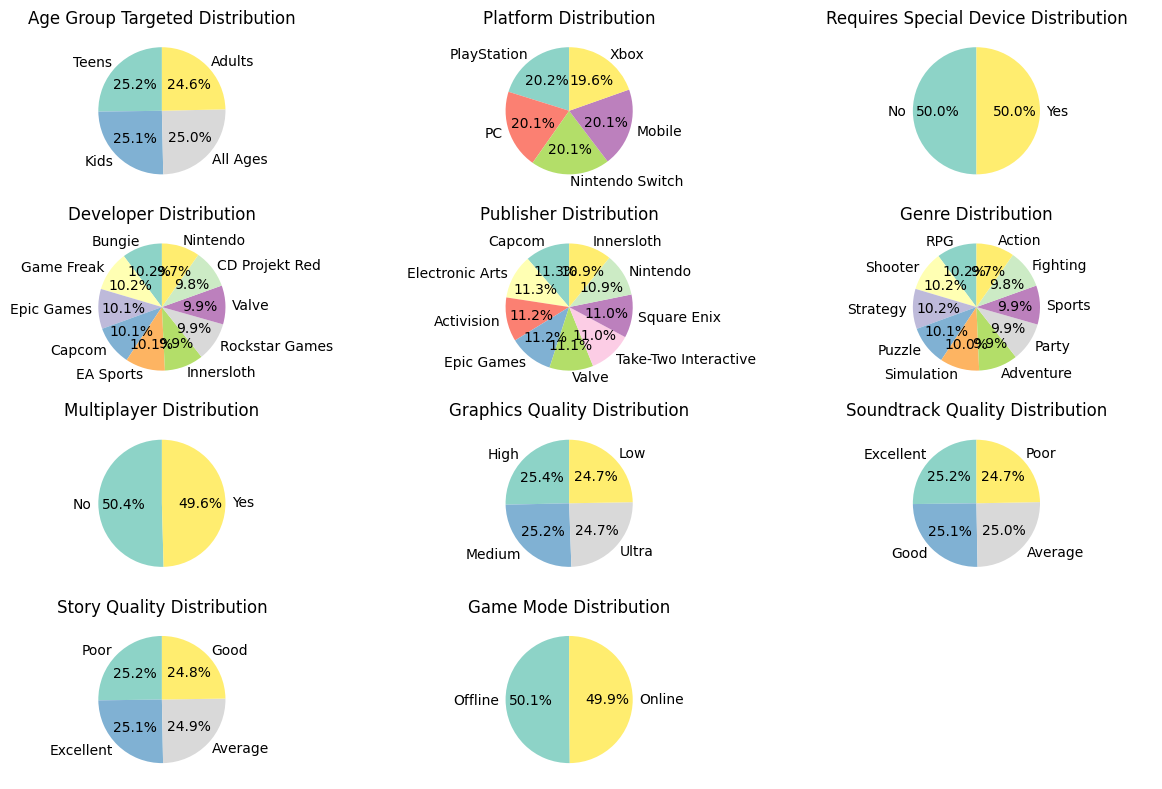

In [8]:
import matplotlib.pyplot as plt
n_cols = 3
categorical_columns=['Age Group Targeted','Platform','Requires Special Device','Developer','Publisher','Genre','Multiplayer','Graphics Quality','Soundtrack Quality','Story Quality',  'Game Mode']
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculates number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

# Flatten axes for easy indexing (in case of single row or column, axes may not be 2D)
axes = axes.flatten()

# Loop through each column and plot its pie chart
for i, col in enumerate(categorical_columns):
    counts = df[col].value_counts()  # Count occurrences in the column
    counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[i], cmap='Set3', legend=False)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_ylabel('')  # Optional: remove y-axis label for clarity

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

<div style="background-color:#66cdaa;;border:0px solid #0A2342; text-align:left; color:black">
<p style="font-size:25px; font-family:tahoma; line-height: 2em; text-indent: 70px;color:black">Data is well distributed without a potential imbalance</p>

<div style="background-color:white; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
<p style="font-size:25px; font-family:tahoma; line-height: 2em; text-indent: 70px;color:black">Problem Statement</p>

<p style="font-size:15px; font-family:tahoma; line-height: 2em; text-indent: 70px;color:black">I will perform further analysis after defining the objective of this notebook.</p>
<p style="font-size:15px; font-family:tahoma; line-height: 2em; text-indent: 70px;color:black">Given  a set of inputs from the user - such as Genre, age, Platform, Game Mode -</p>

<p style="font-size:30px; font-family:tahoma; line-height: 2em; text-indent: 70px;color:Green">I will  predict the estimated number of subscribers of a game based on the price, genre, video quality ,etc <p></p>

<div style="background-color:#66cdaa;;border:0px solid #0A2342; text-align:left; color:black">
<p style="font-size:25px; font-family:tahoma; line-height: 2em; text-indent: 70px;color:black">Data Analysis</p>

### Game Ratings

In [9]:
import seaborn as sns


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Game Title', ylabel='User Rating'>

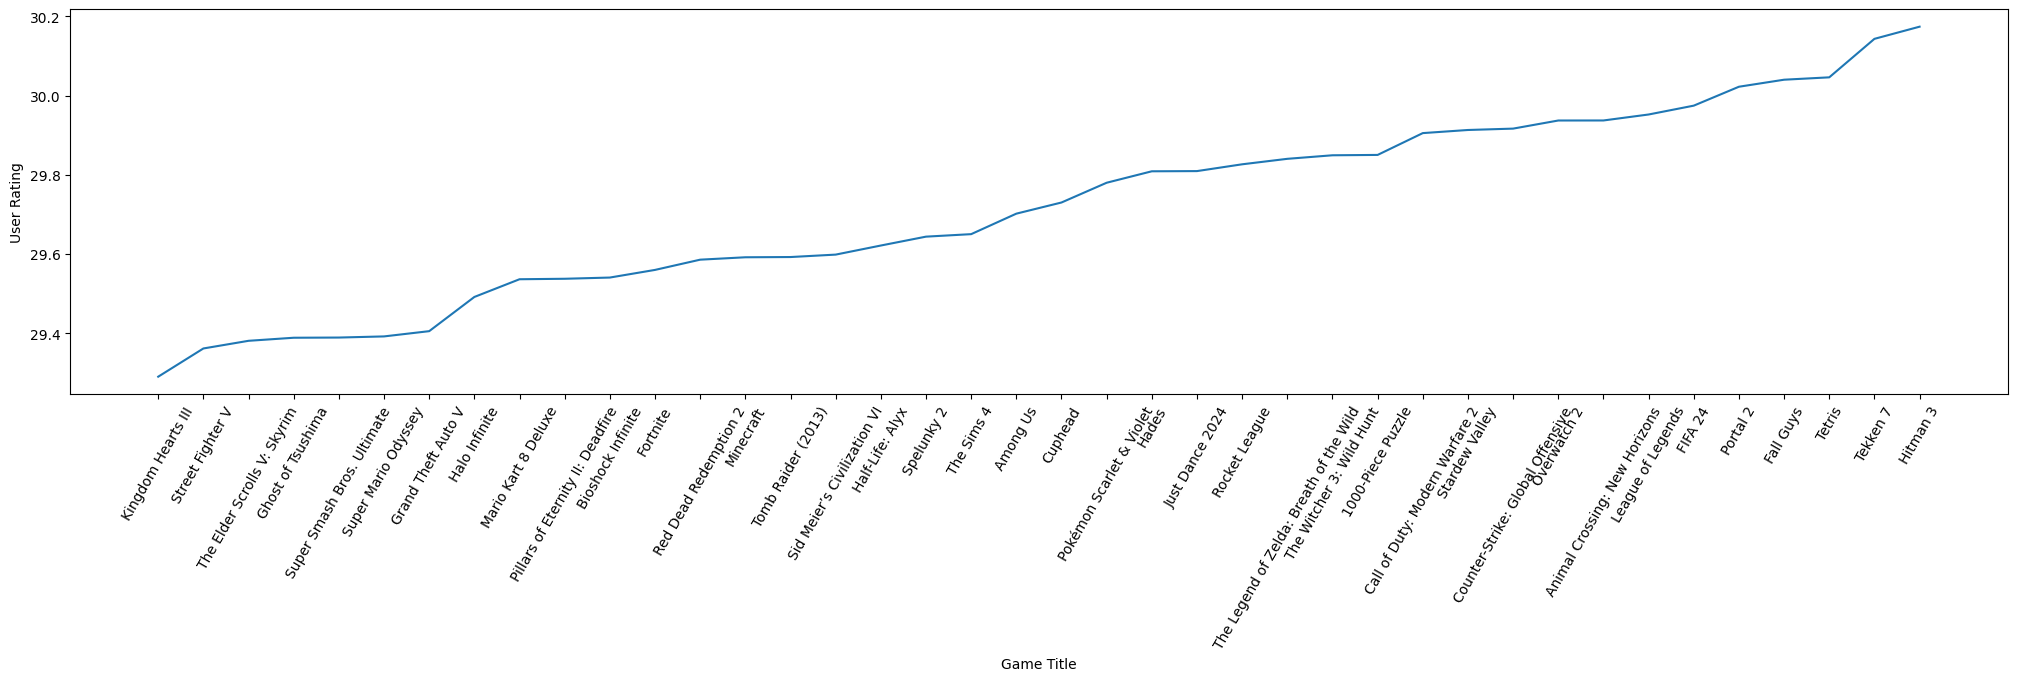

In [10]:
df1   = df.groupby("Game Title").agg({"User Rating":"mean"}).reset_index().sort_values(by='User Rating')
plt.figure(figsize=(25,5))
plt.xticks(rotation=60)
sns.lineplot(x='Game Title',y='User Rating',data=df1)

<Axes: title={'center': 'Game Vs (Total Age Groups Games Released)'}, xlabel='Game Title', ylabel='Count'>

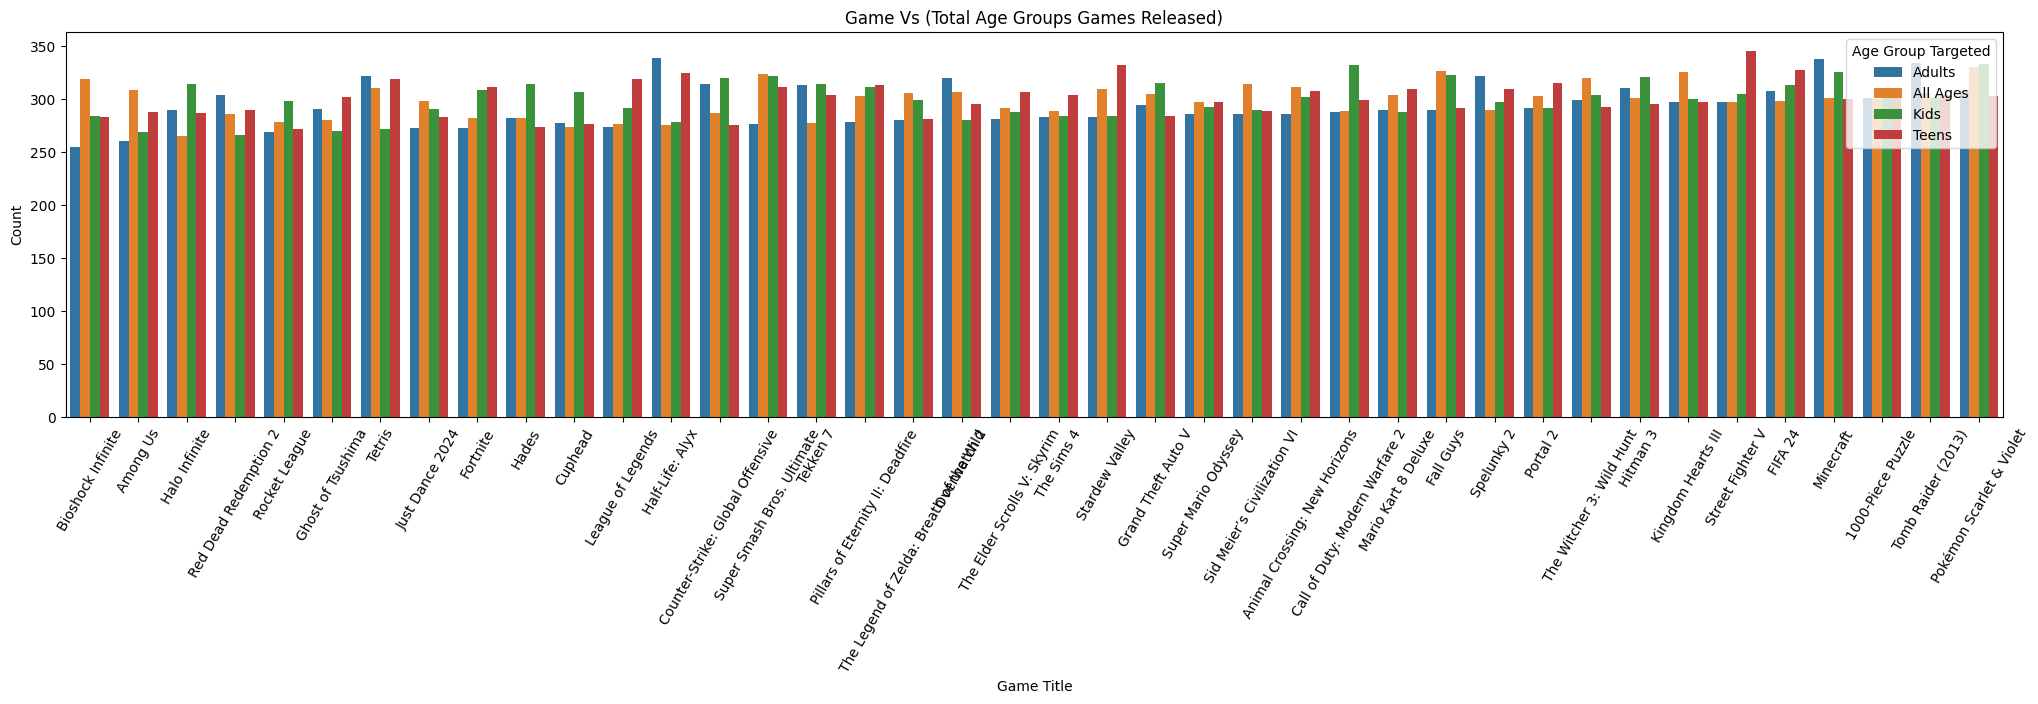

In [11]:
df['Count']=1
df1   = df.groupby(["Game Title","Age Group Targeted"]).agg({"Count":"sum"}).reset_index().sort_values(by='Count')

plt.figure(figsize=(25,5))
plt.xticks(rotation=60)
plt.title("Game Vs (Total Age Groups Games Released)")
sns.barplot(x='Game Title',y='Count',hue='Age Group Targeted',data=df1)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Game Title', ylabel='Price'>

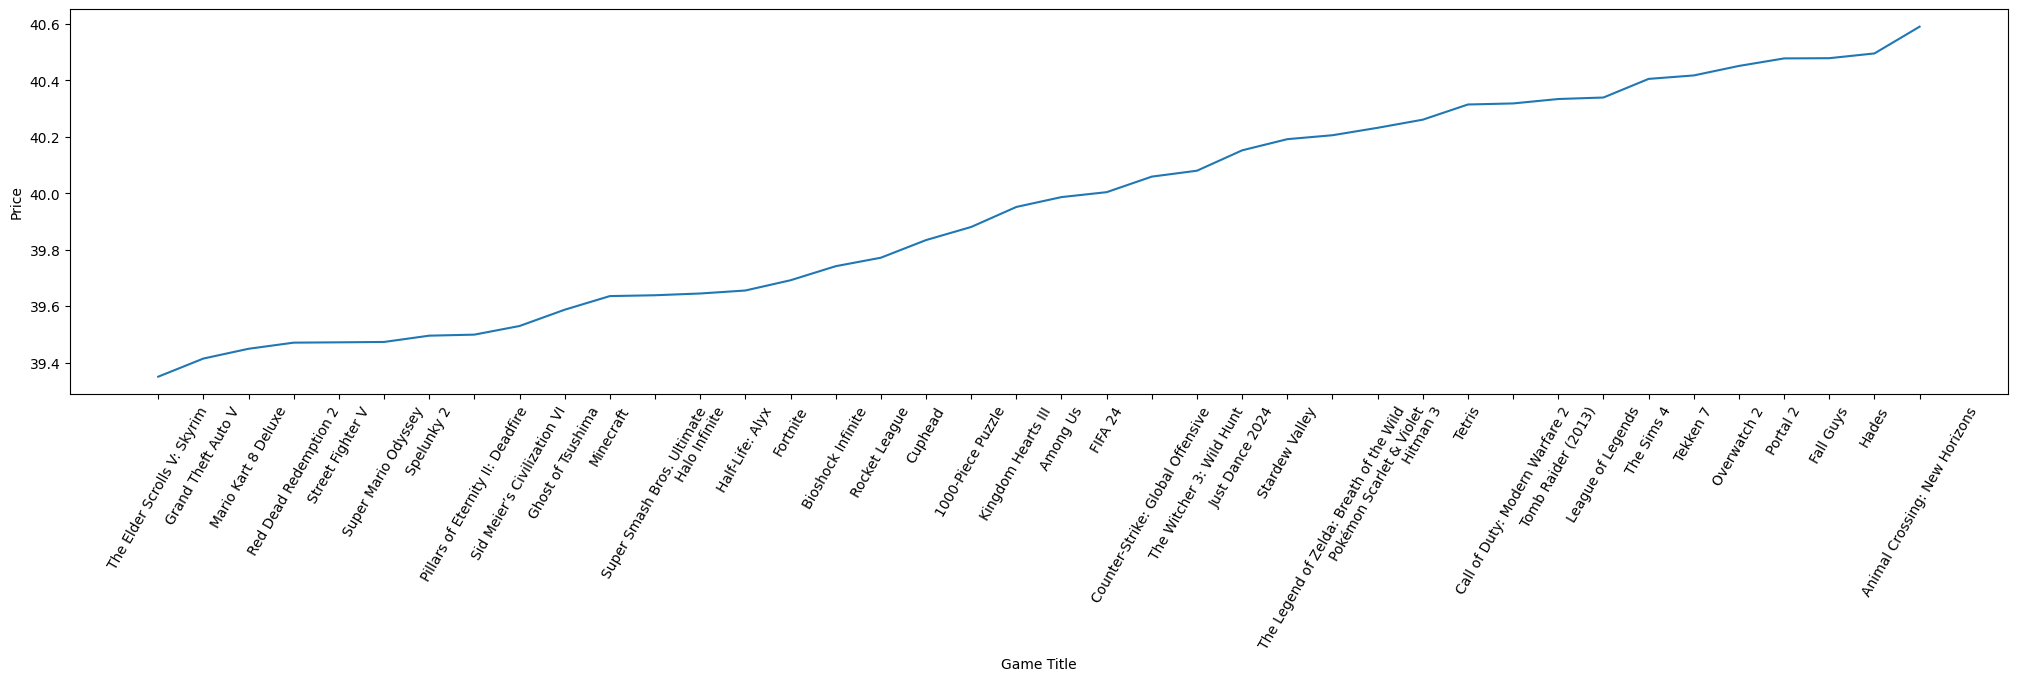

In [12]:
df1   = df.groupby("Game Title").agg({"Price":"mean"}).reset_index().sort_values(by='Price')
plt.figure(figsize=(25,5))
plt.xticks(rotation=60)
sns.lineplot(x='Game Title',y='Price',data=df1)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


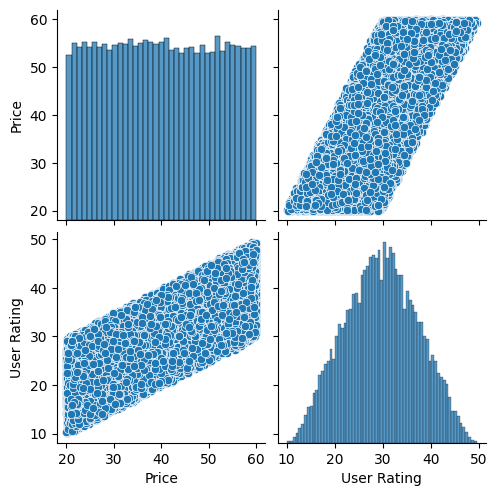

In [13]:
## Impact of Price on User Rating
sns.pairplot(df[['Price','User Rating']])

In [14]:
df.head()

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players,Count
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1,1
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3,1
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5,1
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4,1
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1,1


<Axes: title={'center': ' Total Games Released for different platforms'}, xlabel='Game Title', ylabel='Count'>

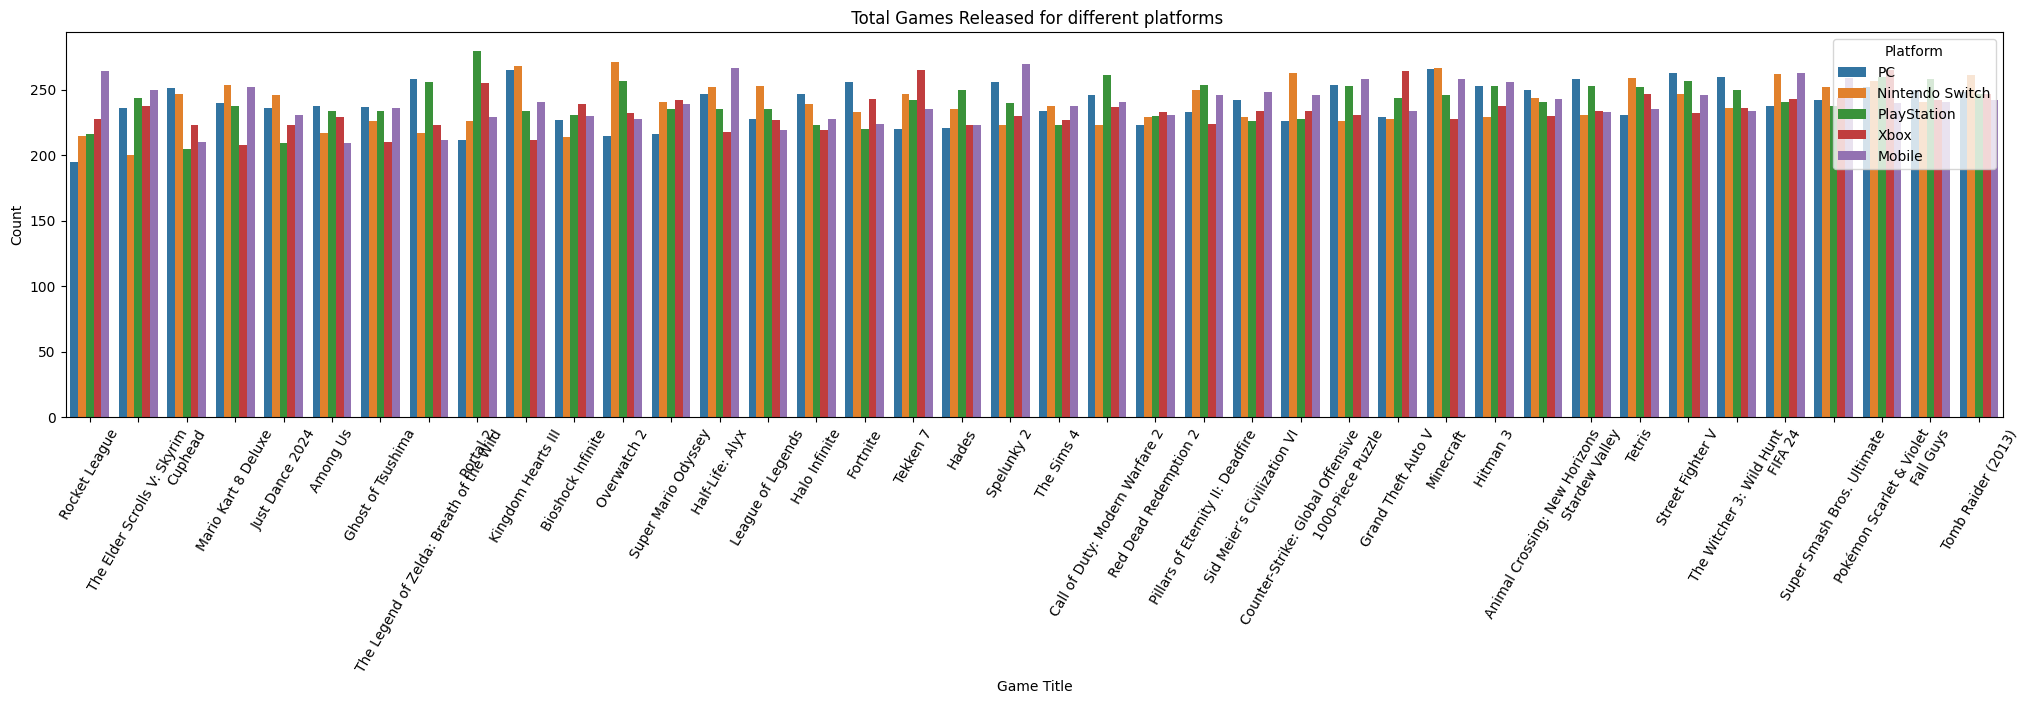

In [15]:

df1   = df.groupby(["Game Title","Platform"]).agg({"Count":"sum"}).reset_index().sort_values(by='Count')

plt.figure(figsize=(25,5))
plt.xticks(rotation=60)
plt.title(" Total Games Released for different platforms")
sns.barplot(x='Game Title',y='Count',hue='Platform',data=df1)

<Axes: title={'center': 'Number of Games Requiring Special Device'}, xlabel='Game Title', ylabel='User Rating'>

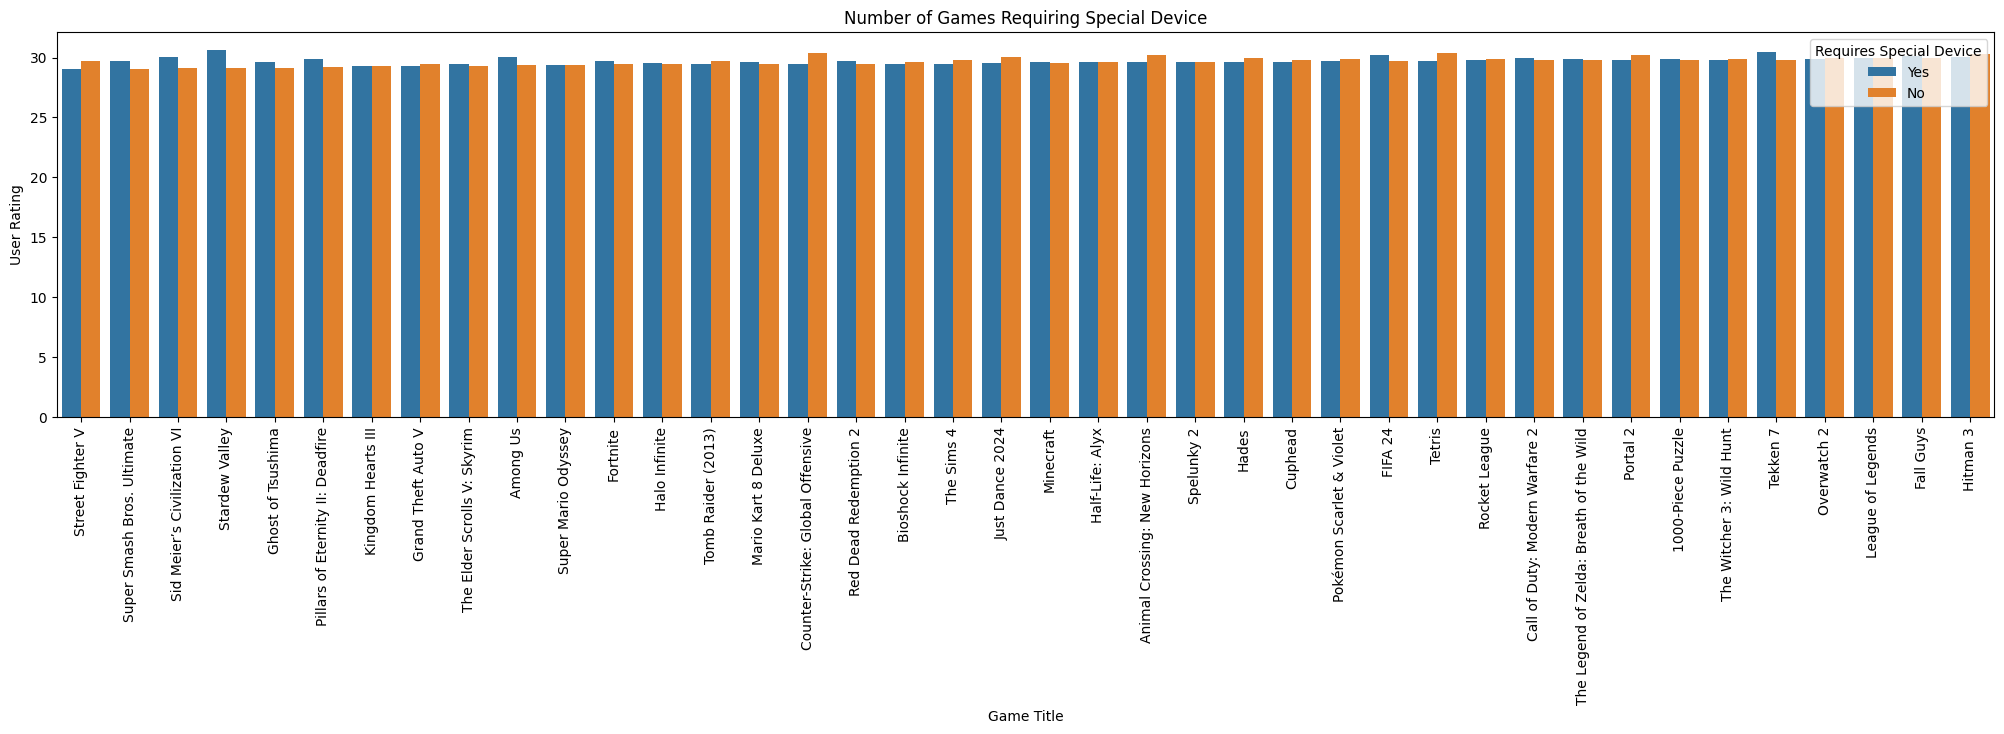

In [16]:

df1   = df.groupby(["Game Title","Requires Special Device"]).agg({"User Rating":"mean"}).reset_index().sort_values(by='User Rating')

plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
plt.title("Number of Games Requiring Special Device")
sns.barplot(x='Game Title',y='User Rating',hue='Requires Special Device',data=df1)

<Axes: title={'center': 'Average Rating per Game'}, xlabel='Game Title', ylabel='User Rating'>

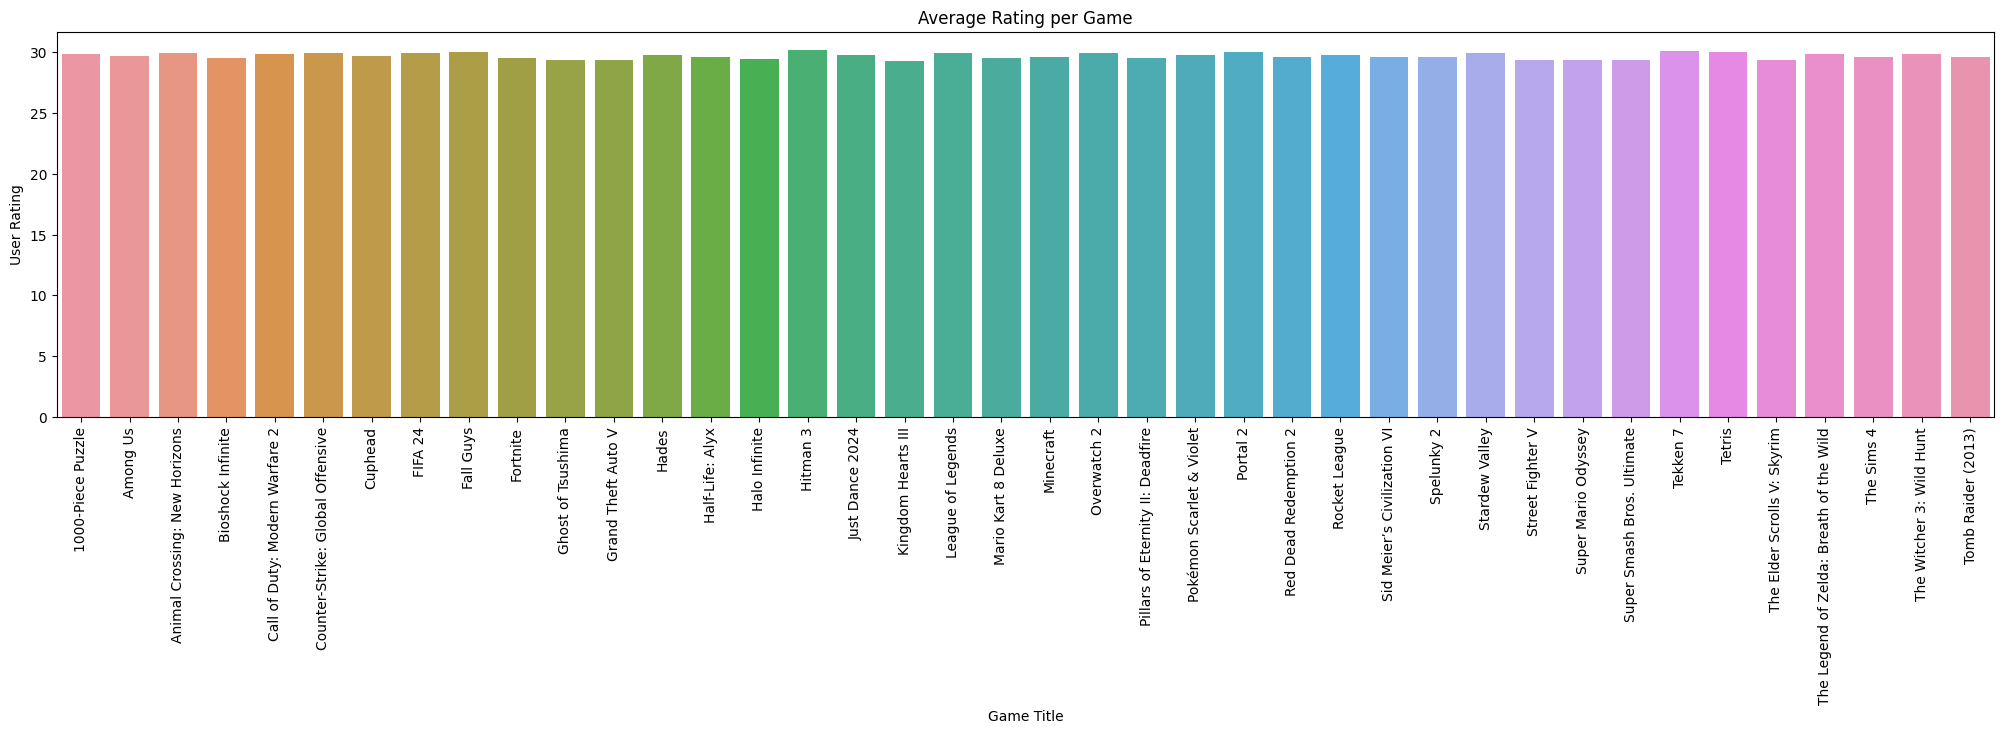

In [17]:
df1   = df.groupby("Game Title").agg({"User Rating":"mean"}).reset_index()
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
plt.title("Average Rating per Game")
sns.barplot(x='Game Title',y='User Rating',data=df1)

<Axes: title={'center': 'Average Rating per User Groups'}, xlabel='Game Title', ylabel='User Rating'>

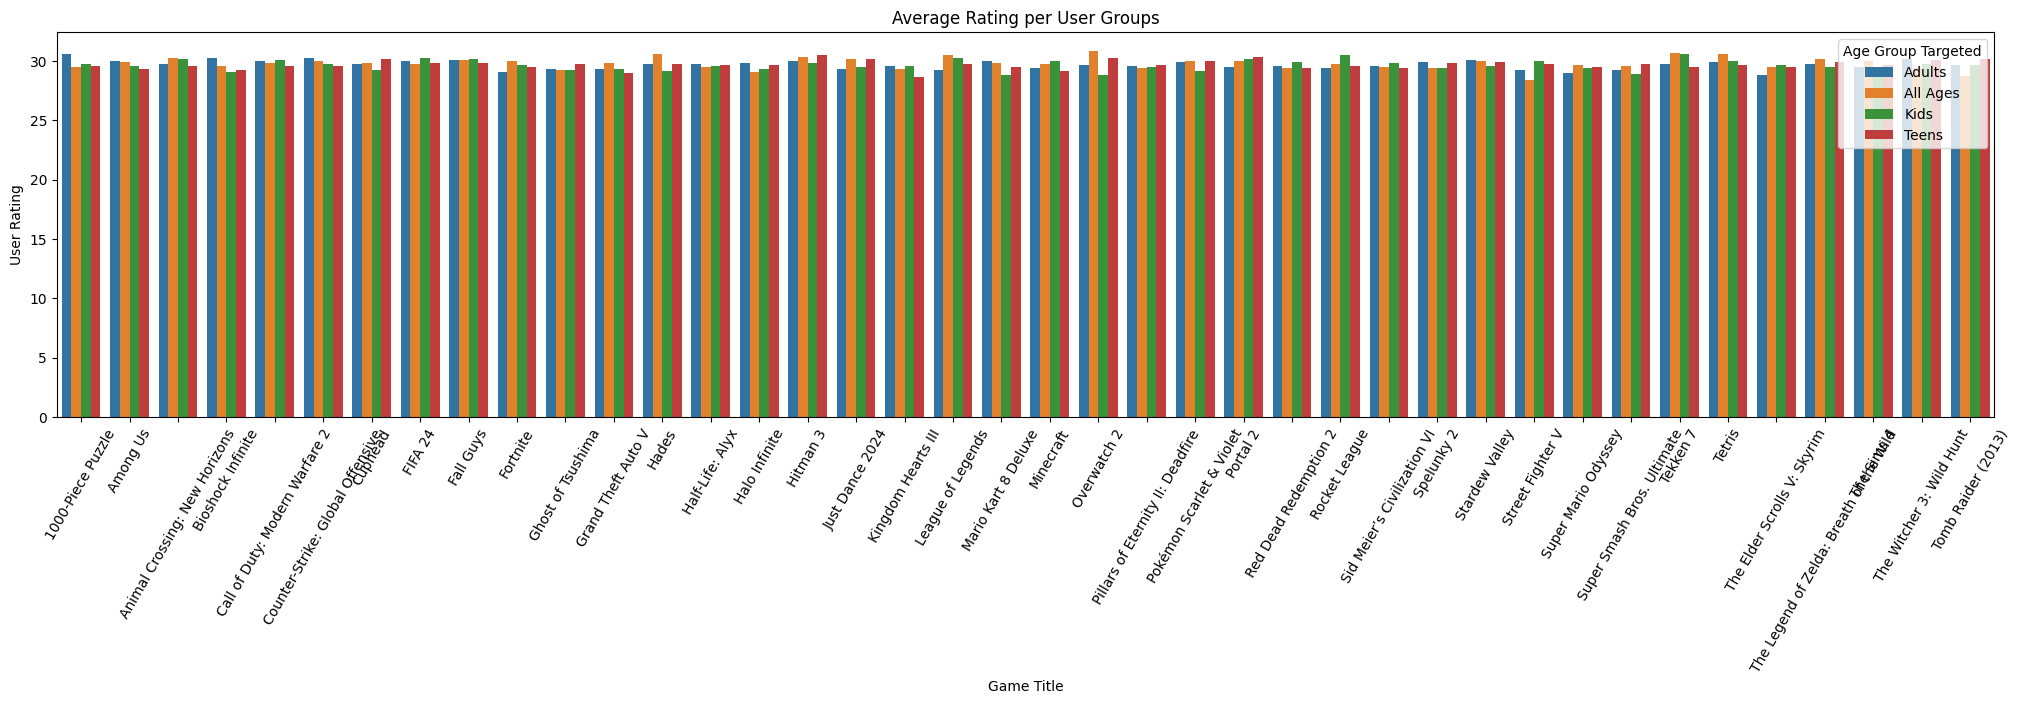

In [18]:
df1   = df.groupby(["Game Title","Age Group Targeted"]).agg({"User Rating":"mean"}).reset_index()
plt.figure(figsize=(25,5))
plt.xticks(rotation=60)
plt.title("Average Rating per User Groups")
sns.barplot(x='Game Title',y='User Rating',hue='Age Group Targeted',data=df1)

<Axes: title={'center': ' Average User Rating per Genre'}, xlabel='Genre', ylabel='User Rating'>

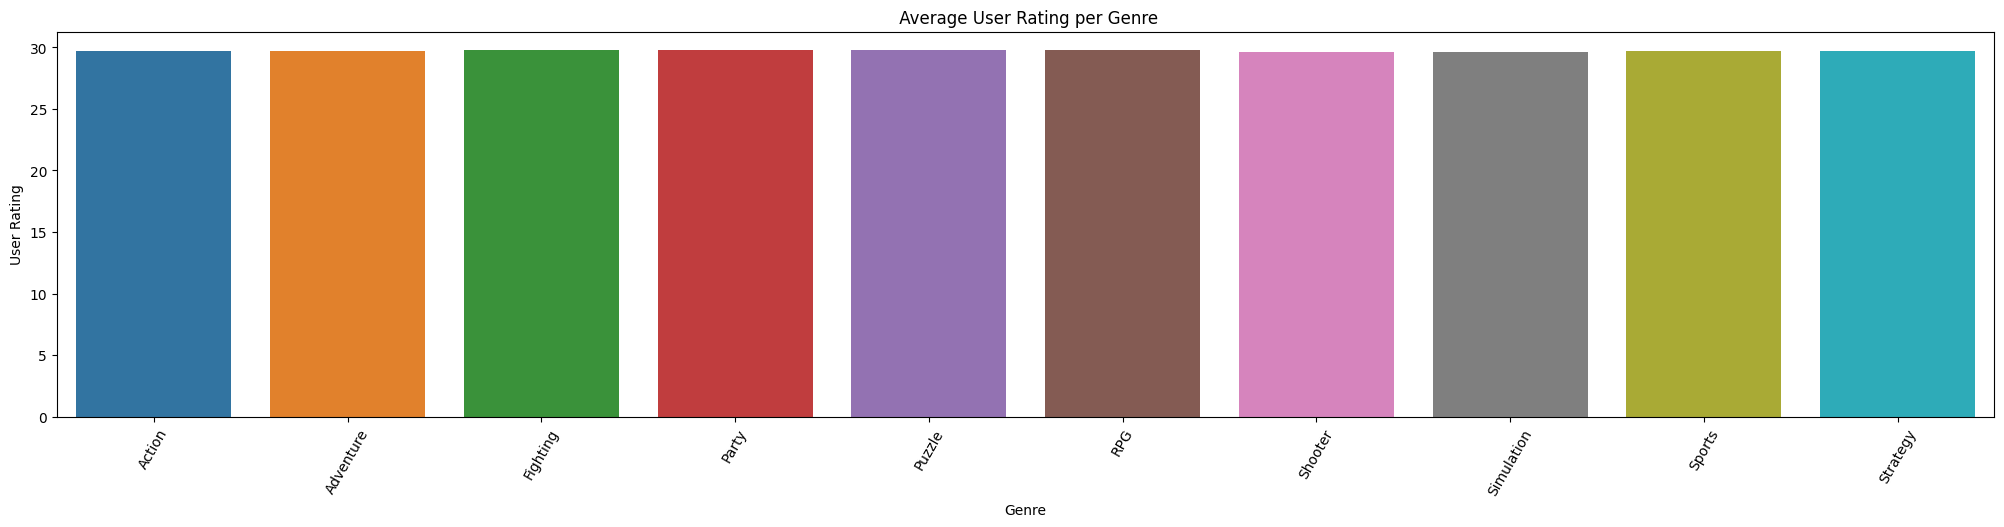

In [19]:
df1   = df.groupby(["Genre"]).agg({"User Rating":"mean"}).reset_index()
plt.figure(figsize=(25,5))
plt.xticks(rotation=60)
plt.title(" Average User Rating per Genre")
sns.barplot(x='Genre',y='User Rating',data=df1)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Impact of Game Length on User Rating'}, xlabel='Game Length (Hours)', ylabel='User Rating'>

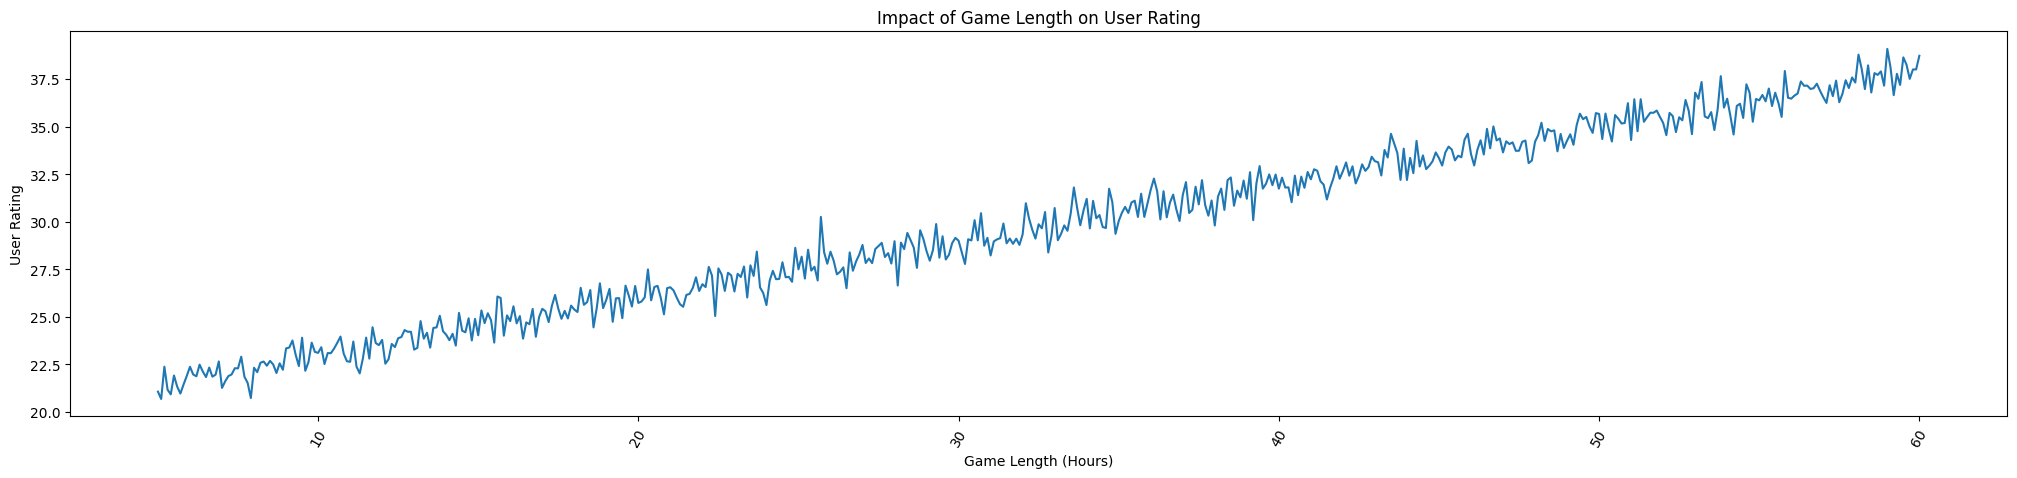

In [20]:
df1   = df.groupby("Game Length (Hours)").agg({"User Rating":"mean"}).reset_index()
plt.figure(figsize=(25,5))
plt.xticks(rotation=60)
plt.title("Impact of Game Length on User Rating")
sns.lineplot(x='Game Length (Hours)',y='User Rating',data=df1)

In [21]:
df.columns

Index(['Game Title', 'User Rating', 'Age Group Targeted', 'Price', 'Platform',
       'Requires Special Device', 'Developer', 'Publisher', 'Release Year',
       'Genre', 'Multiplayer', 'Game Length (Hours)', 'Graphics Quality',
       'Soundtrack Quality', 'Story Quality', 'User Review Text', 'Game Mode',
       'Min Number of Players', 'Count'],
      dtype='object')

<Axes: title={'center': 'Average User Rating per Graphics Quality'}, xlabel='Graphics Quality', ylabel='User Rating'>

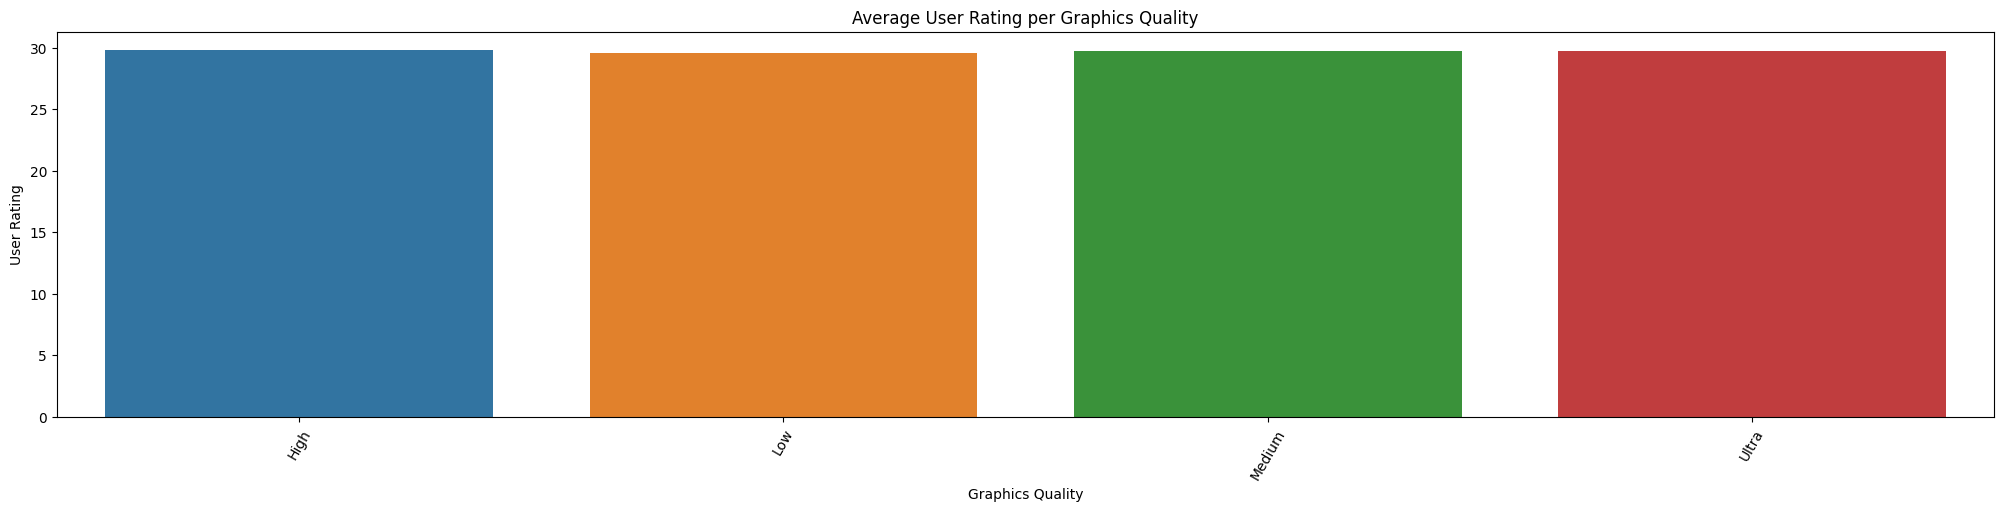

In [22]:
df1   = df.groupby("Graphics Quality").agg({"User Rating":"mean"}).reset_index()
plt.figure(figsize=(25,5))
plt.xticks(rotation=60)
plt.title("Average User Rating per Graphics Quality")
sns.barplot(x='Graphics Quality',y='User Rating',data=df1)

<Axes: title={'center': 'Average User Rating per Soundtrack Quality'}, xlabel='Soundtrack Quality', ylabel='User Rating'>

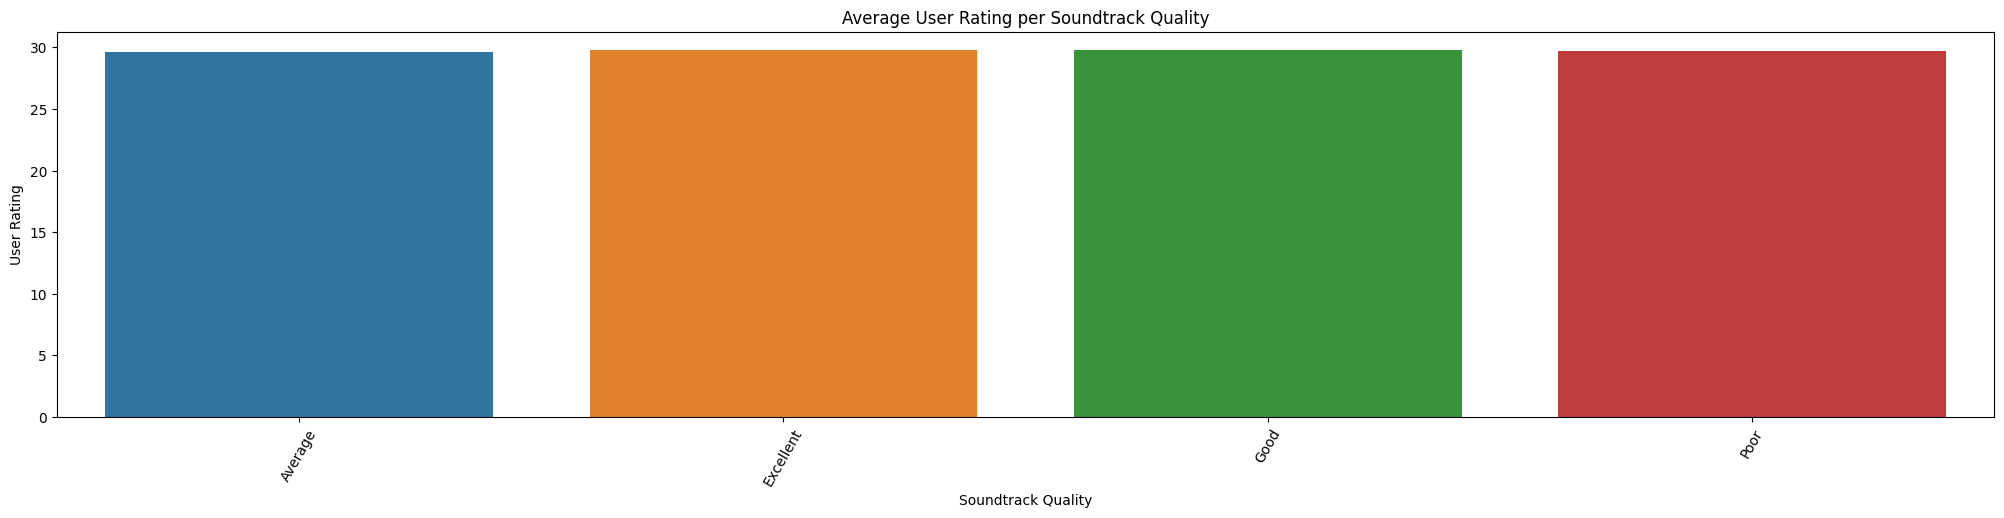

In [23]:
df1   = df.groupby("Soundtrack Quality").agg({"User Rating":"mean"}).reset_index()
plt.figure(figsize=(25,5))
plt.xticks(rotation=60)
plt.title("Average User Rating per Soundtrack Quality")

sns.barplot(x='Soundtrack Quality',y='User Rating',data=df1)

<Axes: title={'center': 'Average User Rating per Sound Quality'}, xlabel='Game Title', ylabel='User Rating'>

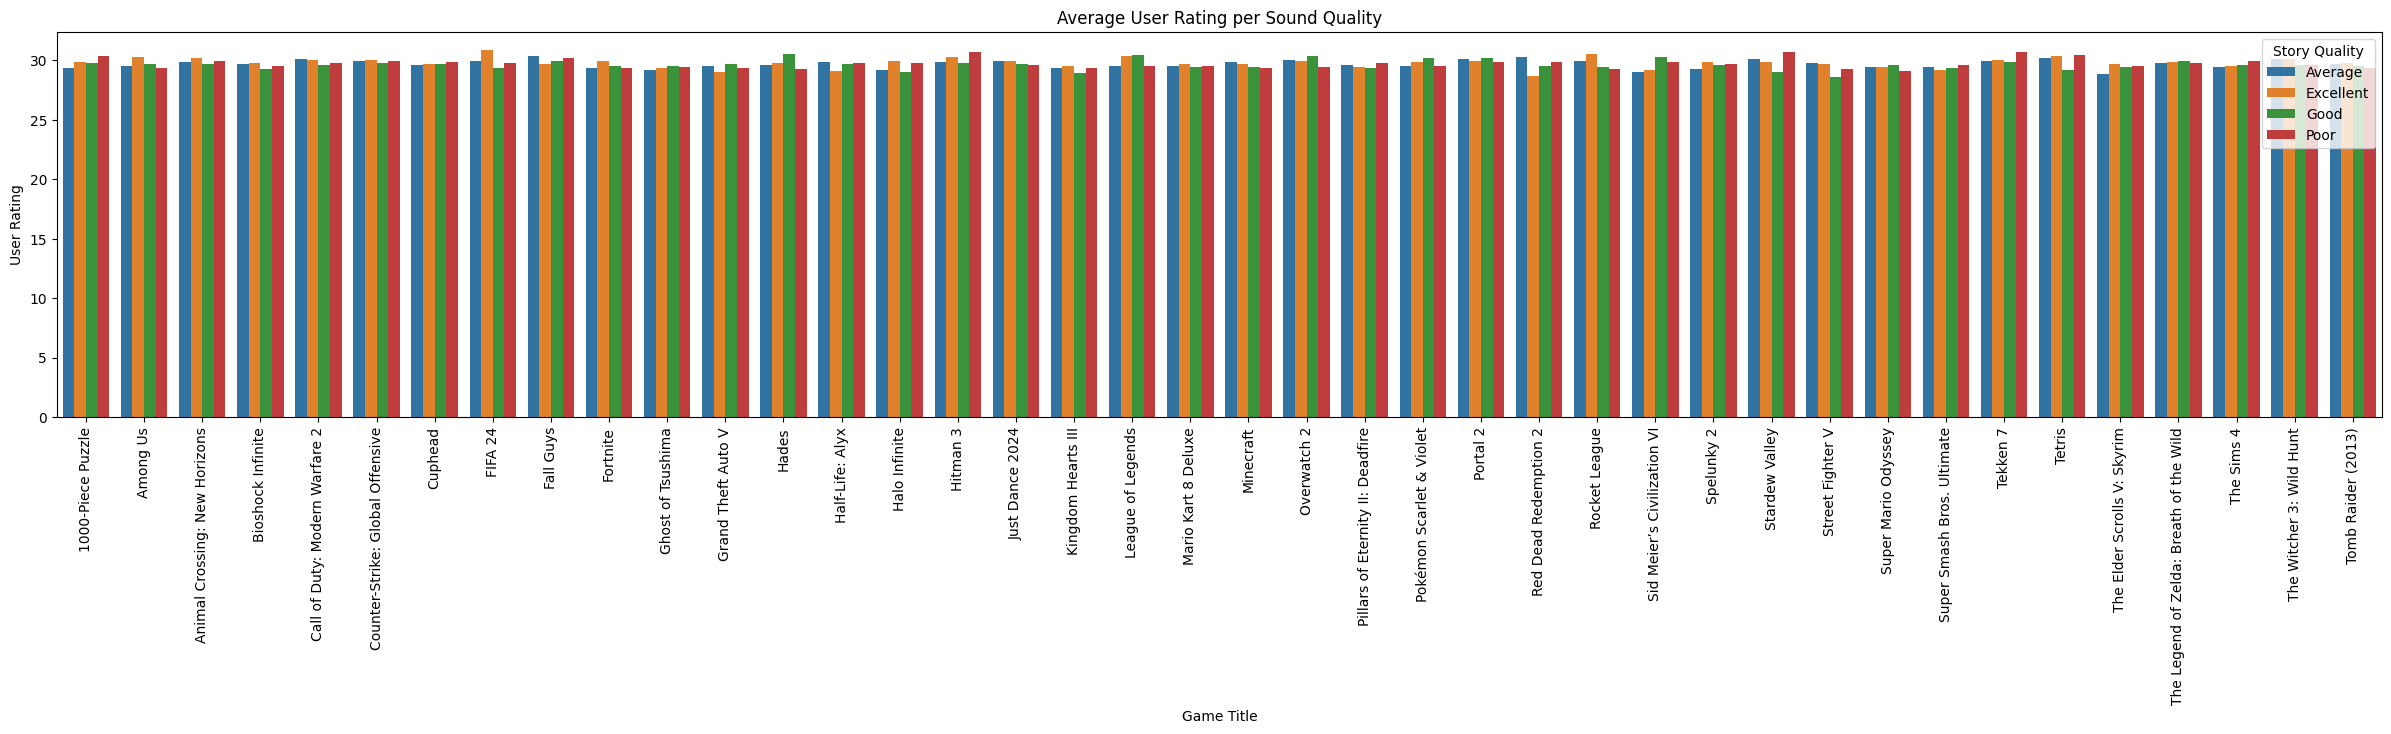

In [24]:

df1   = df.groupby(["Story Quality","Game Title"]).agg({"User Rating":"mean"}).reset_index()
plt.figure(figsize=(30,5))
plt.xticks(rotation=90)
plt.title("Average User Rating per Sound Quality")

sns.barplot(x='Game Title',y='User Rating',hue='Story Quality',data=df1)

<Axes: >

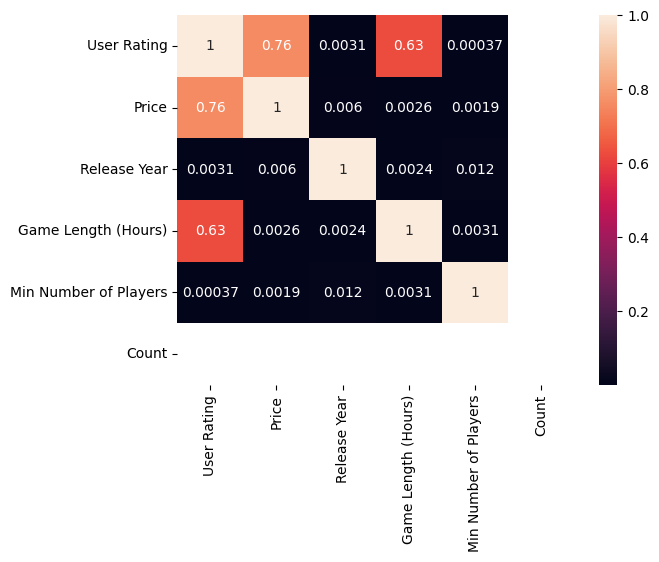

In [25]:
numeric_cols = list(df.select_dtypes(include=['float64','int64']).columns)

sns.heatmap(df[numeric_cols].corr().abs(),annot=True)

<div style="background-color:#66cdaa;;border:0px solid #0A2342; text-align:left; color:black">
<p style="font-size:25px; font-family:tahoma; line-height: 2em; text-indent: 70px;color:black">Game Length & Price have correlation with User Rating </p>

In [26]:
df.dtypes

Game Title                  object
User Rating                float64
Age Group Targeted          object
Price                      float64
Platform                    object
Requires Special Device     object
Developer                   object
Publisher                   object
Release Year                 int64
Genre                       object
Multiplayer                 object
Game Length (Hours)        float64
Graphics Quality            object
Soundtrack Quality          object
Story Quality               object
User Review Text            object
Game Mode                   object
Min Number of Players        int64
Count                        int64
dtype: object

In [27]:
df.head()

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players,Count
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1,1
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3,1
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5,1
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4,1
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1,1


<div style="background-color:#66cdaa;;border:0px solid #0A2342; text-align:left; color:black">
<p style="font-size:25px; font-family:tahoma; line-height: 2em; text-indent: 70px;color:black">Standardization and Encoding </p>

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

<div style="background-color:#66cdaa;;border:0px solid #0A2342; text-align:left; color:black">
<p style="font-size:25px; font-family:tahoma; line-height: 2em; text-indent: 70px;color:black">We will use OneHotEncoding for String Columns and Standard Scaling for numerical Column to bring values to common scale </p>

In [29]:
X = df[['Price','Game Length (Hours)','Age Group Targeted','Platform','Requires Special Device','Genre','Multiplayer','Graphics Quality','Soundtrack Quality','Story Quality','Game Mode','Min Number of Players']]
Y=df['User Rating']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)


numeric_cols = list(X_train.select_dtypes(include=['float64','int64']).columns)
string_cols = list(X_train.select_dtypes(include=['object']).columns)
transformer = ColumnTransformer(
    [
("scaler",StandardScaler(),numeric_cols),
("encoder",OneHotEncoder(),string_cols)
        
    ],remainder='passthrough'
)

In [30]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [31]:
target_encoder = LabelEncoder()
Y_train_transformed = target_encoder.fit_transform(Y_train)
Y_test_transformed = target_encoder.fit_transform(Y_test)

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score



<div style="background-color:#66cdaa;;border:0px solid #0A2342; text-align:left; color:black">
<p style="font-size:25px; font-family:tahoma; line-height: 2em; text-indent: 70px;color:black">Model Training and Evaluation. We will use multiple models and compare their accuracy by analyzing MAE, MSE and R2 Score </p>

In [33]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
models = {

    "Lasso":Lasso(),
    "Linear":LinearRegression(),
    "DecisionTree":DecisionTreeRegressor(),
    "Adaboost":AdaBoostRegressor(),
    "Bagging":BaggingRegressor(),
    "GradientBoost":GradientBoostingRegressor(),
    "RandomForest":RandomForestRegressor(),
   
}

In [34]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2=[]
mae = []
mse=[]
names=[]
for name,model in models.items():
    model.fit(X_train_transformed,Y_train)
    ypred = model.predict(X_test_transformed)
    r2.append(r2_score(Y_test,ypred))
    mae.append(mean_absolute_error(Y_test,ypred))
    mse.append(np.sqrt(mean_squared_error(Y_test,ypred)))
    names.append(name)

In [35]:
results = pd.DataFrame()
results["Name"]=names
results['Mean Absolute Error']=mae
results['Mean Squared Error']=mse
results['r2 Score']=r2

In [36]:
results

,Name,Mean Absolute Error,Mean Squared Error,r2 Score
0,Lasso,1.498273,1.843123,0.940966
1,Linear,1.006656,1.162900,0.976499
2,DecisionTree,1.350862,1.662876,0.951948
3,Adaboost,1.256712,1.541907,0.958685
4,Bagging,1.064303,1.256524,0.972563
5,GradientBoost,1.019360,1.185972,0.975558
6,RandomForest,1.030670,1.206572,0.974701


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Model Vs Mean Squared Error'}, xlabel='Name', ylabel='Mean Squared Error'>

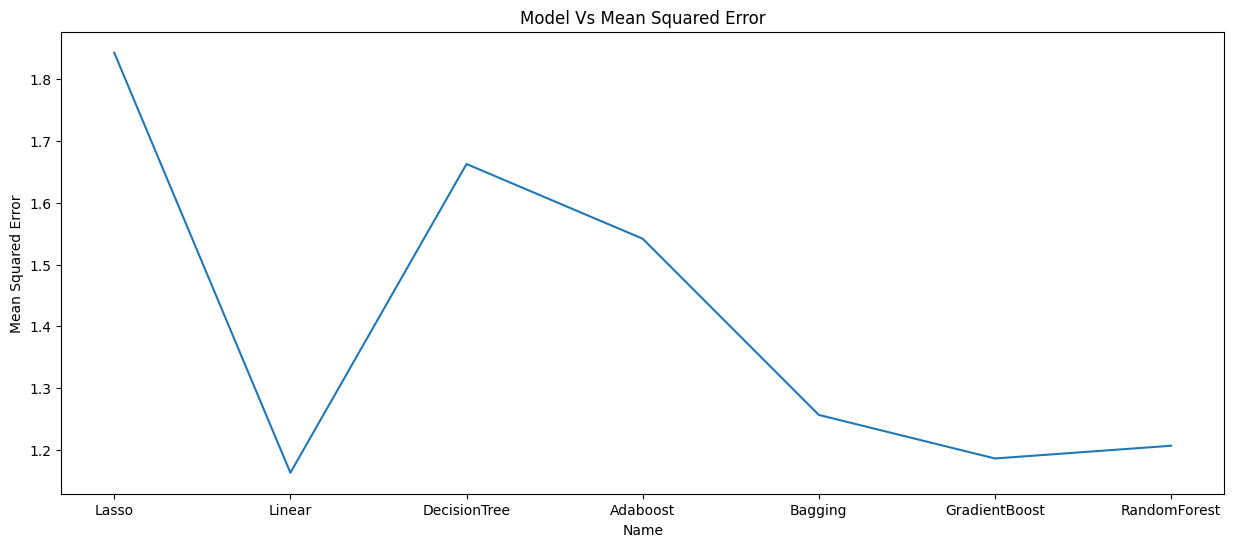

In [37]:
plt.figure(figsize=(15,6))
plt.title("Model Vs Mean Squared Error")
sns.lineplot(x='Name',y='Mean Squared Error',data=results)

<div style="background-color:#66cdaa;;border:0px solid #0A2342; text-align:left; color:black">
<p style="font-size:25px; font-family:tahoma; line-height: 2em; text-indent: 70px;color:black">Plotting Actual Vs Predicted Values </p>

<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
<p style="font-size:45px; font-family:tahoma; line-height: 2em; text-indent: 70px;color:white">Thankyou for following my notebook here!!!  </p>
<p style="font-size:24px; font-family:tahoma; line-height: 2em; text-indent: 70px;">In this notebook, we have explored different features and their impact on User Rating  </p>
<p style="font-size:24px; font-family:tahoma; line-height: 2em; text-indent: 70px;">We used Several Algorithms to test the accuracy and achieved the best accuracy with LinearModel itself.  </p>
<p style="font-size:24px; font-family:tahoma; line-height: 2em; text-indent: 70px;color:blue">The model fits the data well with R2 Score of 0.98 </p></div></div>
<p style="font-size:24px; font-family:tahoma; line-height: 2em; text-indent: 70px;color:Orange">Please Upvote if you liked my work :)  </p></div></div>